# Bước 1: Làm sạch dữ liệu và Phân tích khám phá (EDA)

## Tóm tắt tổng quan
- **Dữ liệu gốc**: 541,909 giao dịch từ công ty bán lẻ UK (2010-2011)  
- **Sau làm sạch**: 397,924 giao dịch hợp lệ từ 4,372 khách hàng UK
- **Mục đích**: Chuẩn bị dữ liệu chất lượng cao cho phân khúc khách hàng

## Quy trình thực hiện

1. **Tải và hiểu dữ liệu** - Khám phá cấu trúc và chất lượng
2. **Làm sạch dữ liệu** - Loại bỏ giao dịch không hợp lệ  
3. **Phân tích EDA** - Tìm hiểu patterns và trends
4. **Trực quan hóa** - Visualize insights quan trọng
5. **Xuất dữ liệu sạch** - Chuẩn bị cho bước tiếp theo

## Về tập dữ liệu

**Nguồn**: Công ty bán lẻ trực tuyến UK chuyên quà tặng độc đáo  
**Thời gian**: 12/2010 - 12/2011  
**Phạm vi**: Giao dịch toàn cầu với focus vào thị trường UK

### Các trường dữ liệu chính:
| Trường | Mô tả | Ví dụ |
|---------|--------|--------|  
| `InvoiceNo` | Mã hóa đơn (6 chữ số) | 536365 |
| `StockCode` | Mã sản phẩm | 85123A |
| `Description` | Tên sản phẩm | WHITE HANGING HEART |
| `Quantity` | Số lượng mua | 6 |
| `InvoiceDate` | Thời gian giao dịch | 2010-12-01 08:26:00 |
| `UnitPrice` | Đơn giá (GBP) | 2.55 |
| `CustomerID` | ID khách hàng | 17850 |
| `Country` | Quốc gia | United Kingdom |

## Parameters 
Gán tham số để sử dụng cho papermill

In [1]:
# PARAMETERS (for papermill)

# Đường dẫn file dữ liệu gốc
DATA_PATH = "data/raw/online_retail.csv"

# Tên country cần phân tích (mặc định: UK)
COUNTRY = "United Kingdom"

# Thư mục lưu dữ liệu đã xử lý
OUTPUT_DIR = "data/processed"

# Một số tham số EDA (nếu sau này muốn bật/tắt nhanh)
PLOT_REVENUE = True
PLOT_TIME_PATTERNS = True
PLOT_PRODUCTS = True
PLOT_CUSTOMERS = True
PLOT_RFM = True


In [2]:
# Parameters
DATA_PATH = "data/raw/online_retail.csv"
COUNTRY = "United Kingdom"
OUTPUT_DIR = "data/processed"
PLOT_REVENUE = True
PLOT_TIME_PATTERNS = True
PLOT_PRODUCTS = True
PLOT_CUSTOMERS = True
PLOT_RFM = True


## Set up

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys

# Xác định project_root linh hoạt
cwd = os.getcwd()
if os.path.basename(cwd) == "notebooks":
    # Đang chạy từ thư mục notebooks
    project_root = os.path.abspath("..")
else:
    # Đang chạy từ root project (papermill, VSCode, v.v.)
    project_root = cwd

src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from cluster_library import DataCleaner, DataVisualizer 

import pandas as pd
import matplotlib.pyplot as plt



In [4]:
# Khởi tạo DataVisualizer với style đã cấu hình
visualizer = DataVisualizer()

## Tải dữ liệu

In [5]:
# Đọc dữ liệu gốc
cleaner = DataCleaner(DATA_PATH)
df = cleaner.load_data()

# Hiển thị 5 dòng đầu tiên
df.head()


Kích thước dữ liệu: (541909, 8)
Số bản ghi: 541,909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom


In [6]:
print("Thông tin về tập dữ liệu Online retail:")

print(f"- Kích thước dữ liệu: {df.shape[0]:,} dòng và {df.shape[1]:} cột")

missing_values = df.isnull().sum().sum()
print(f"- Tổng số giá trị thiếu: {missing_values:,} ô")

print(f"- Khách hàng duy nhất (bao gồm cả NaN): {df['CustomerID'].nunique(dropna=True):,} khách hàng")

df.info()


Thông tin về tập dữ liệu Online retail:
- Kích thước dữ liệu: 541,909 dòng và 8 cột


- Tổng số giá trị thiếu: 1,454 ô
- Khách hàng duy nhất (bao gồm cả NaN): 4,373 khách hàng
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


## Làm sạch dữ liệu
Ta thực hiện làm sạch dữ liệu theo các bước:
### 1. Loại bỏ các hoá đơn bị huỷ
### 2. Tập trung vào khách hàng UK only
### 3. Loại bỏ bản ghi có quantity hoặc price không hợp lệ

In [7]:
# Làm sạch dữ liệu cho country được chọn
df_country = cleaner.clean_data()  

# Tạo time features
cleaner.create_time_features()

print("\nThông tin về tập dữ liệu sau khi làm sạch:")
print(f"- Dữ liệu gốc: {df.shape[0]:,} giao dịch")
print(f"- Dữ liệu sau làm sạch ({COUNTRY}): {df_country.shape[0]:,} giao dịch")
print(f"- Loại bỏ: {df.shape[0] - df_country.shape[0]:,} giao dịch "
      f"({((df.shape[0] - df_country.shape[0]) / df.shape[0] * 100):.1f}%)")
print(f"- Khách hàng {COUNTRY}: {df_country['CustomerID'].nunique():,}")

df_country.head()



Thông tin về tập dữ liệu sau khi làm sạch:
- Dữ liệu gốc: 541,909 giao dịch
- Dữ liệu sau làm sạch (United Kingdom): 485,123 giao dịch
- Loại bỏ: 56,786 giao dịch (10.5%)
- Khách hàng United Kingdom: 3,921


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8


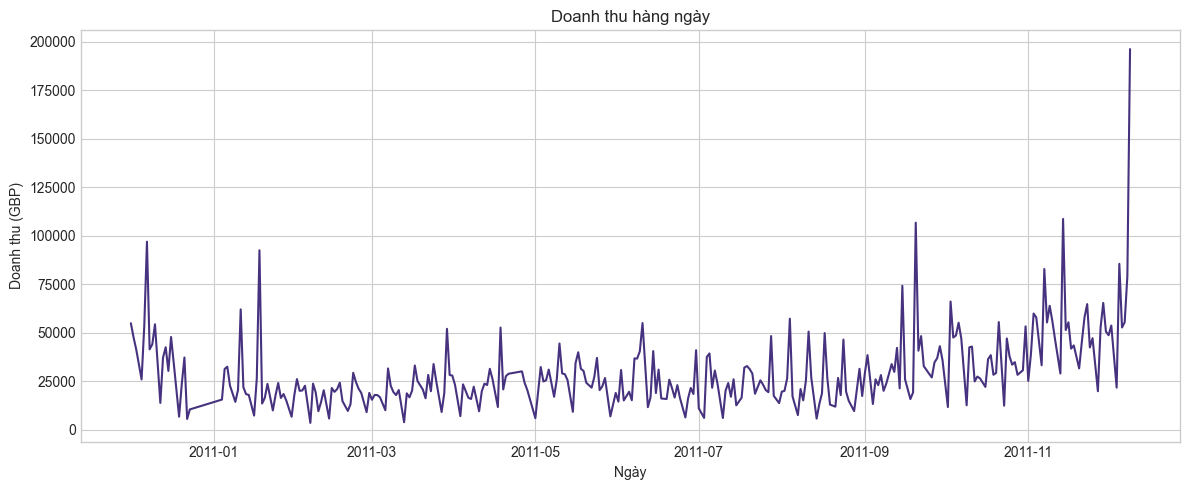

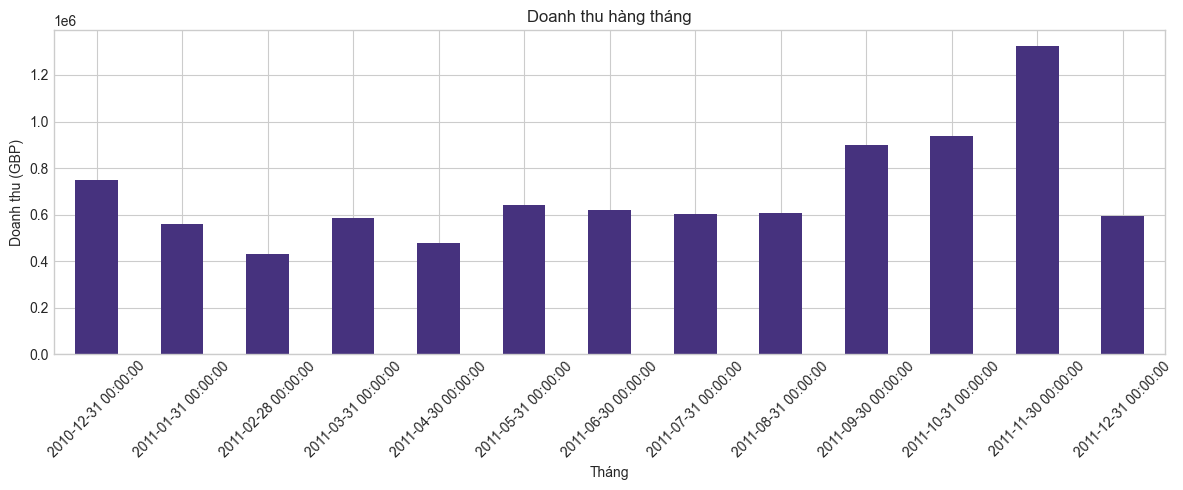

In [8]:
# Phân tích doanh thu theo thời gian
if PLOT_REVENUE:
    visualizer.plot_revenue_over_time(df_country)


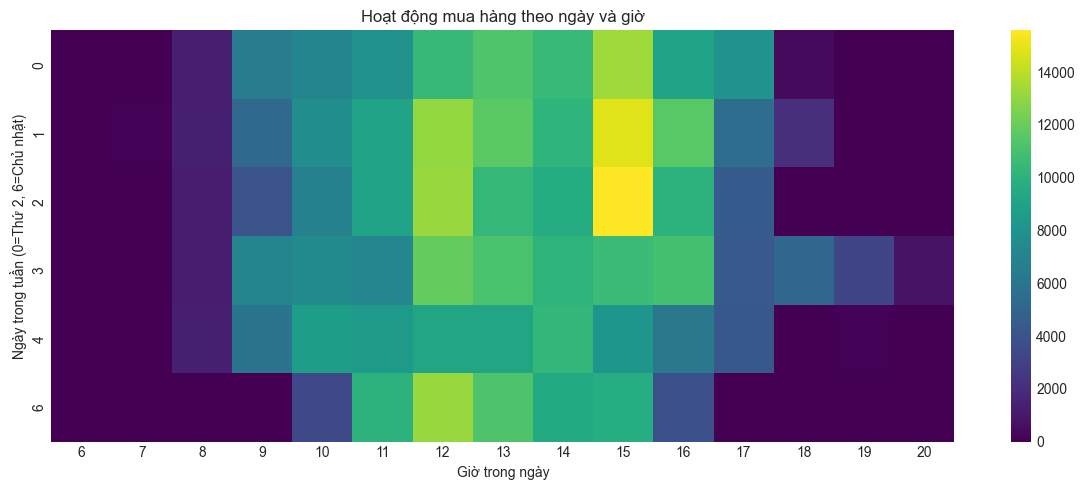

In [9]:
# Phân tích mẫu thời gian mua hàng 
if PLOT_TIME_PATTERNS:
    visualizer.plot_time_patterns(df_country)


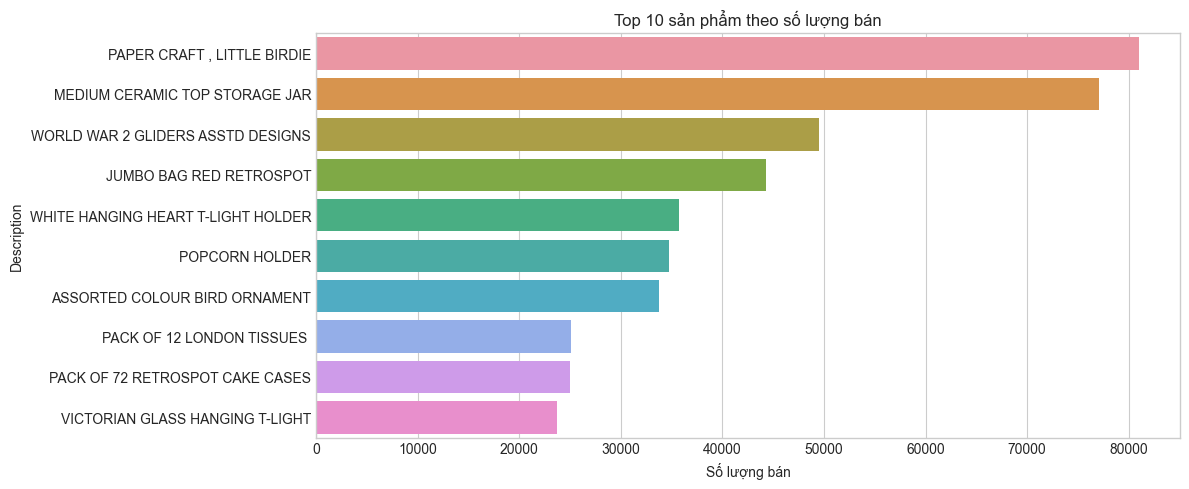

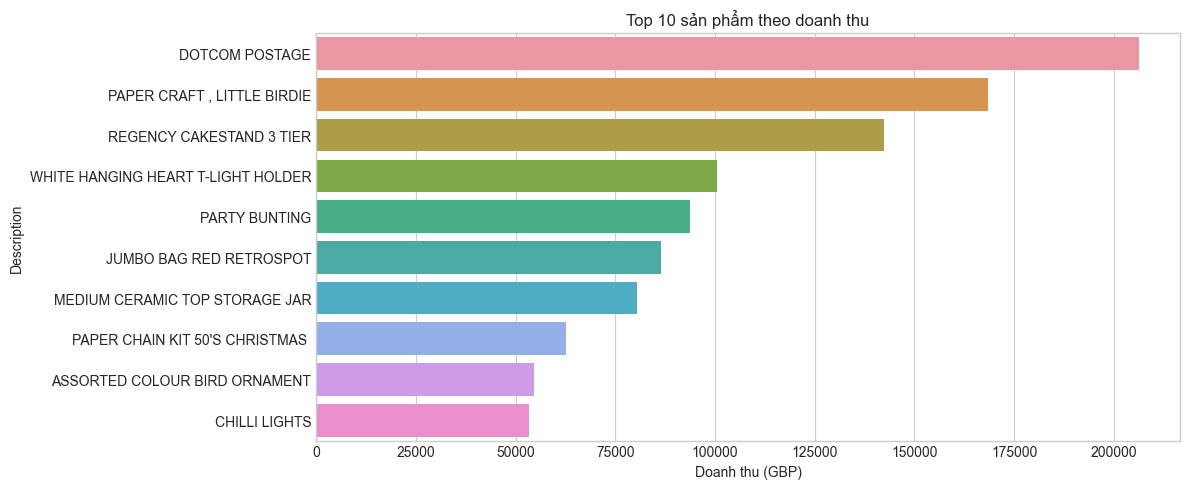

In [10]:
# Phân tích các sản phẩm bán chạy nhất
if PLOT_PRODUCTS:
    visualizer.plot_product_analysis(df_country, top_n=10)


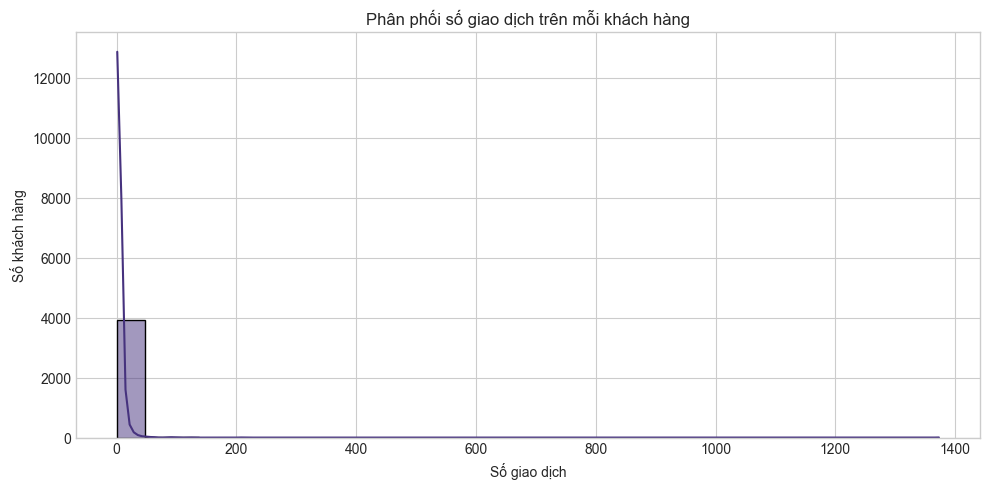

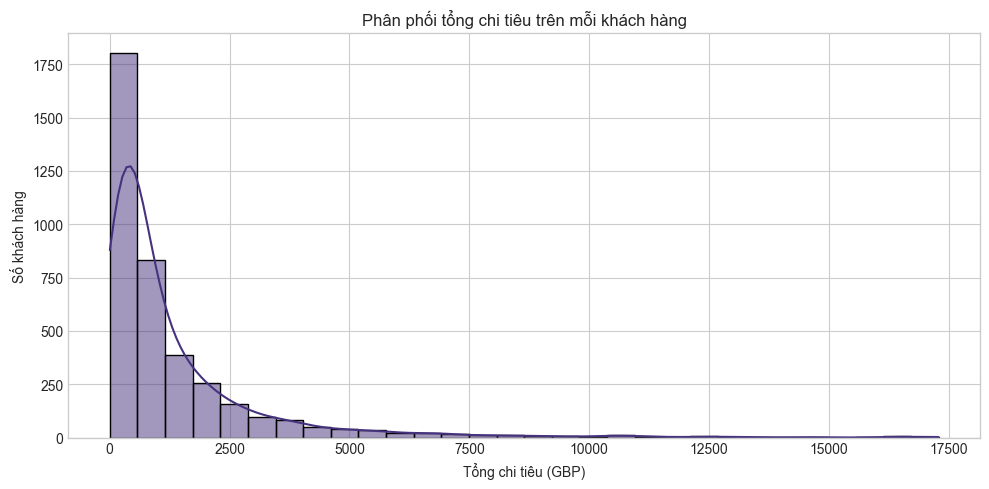

In [11]:
# Phân phối hành vi khách hàng
if PLOT_CUSTOMERS:
    visualizer.plot_customer_distribution(df_country)

In [12]:
# Phân tích chi tiêu của khách hàng
spend_per_customer = df_country.groupby('CustomerID')['TotalPrice'].sum()
transactions_per_customer = df_country.groupby("CustomerID")["InvoiceNo"].nunique()

print("Phân tích hành vi khách hàng:")
print(f"- Chi tiêu trung bình: £{spend_per_customer.mean():.2f}")
print(f"- Chi tiêu median: £{spend_per_customer.median():.2f}")
print(f"- Giao dịch trung bình: {transactions_per_customer.mean():.1f} lần")

spend_per_customer.describe()

Phân tích hành vi khách hàng:
- Chi tiêu trung bình: £2301.77
- Chi tiêu median: £652.74
- Giao dịch trung bình: 4.6 lần


count    3.921000e+03
mean     2.301765e+03
std      2.839137e+04
min      3.750000e+00
25%      3.003600e+02
50%      6.527400e+02
75%      1.578670e+03
max      1.716831e+06
Name: TotalPrice, dtype: float64

### Phân tích RFM

Recency (Gần đây): Khách hàng mua hàng lần cuối cách đây bao lâu?

Frequency (Tần suất): Họ mua hàng thường xuyên như thế nào?

Monetary (Tiền tệ): Họ chi tiêu bao nhiều tiền?

In [13]:
# Tính toán các chỉ số RFM (Recency, Frequency, Monetary) cho tập {COUNTRY}
rfm_data = cleaner.compute_rfm()

print("Phân tích RFM:")
print(f"- Trung bình Recency: {rfm_data['Recency'].mean():.0f} ngày")
print(f"- Trung bình Frequency: {rfm_data['Frequency'].mean():.1f} giao dịch")
print(f"- Trung bình Monetary: £{rfm_data['Monetary'].mean():.2f}")

rfm_data.head(10)


Phân tích RFM:
- Trung bình Recency: 92 ngày
- Trung bình Frequency: 4.6 giao dịch
- Trung bình Monetary: £2301.77


,CustomerID,Recency,Frequency,Monetary
0,000nan,1,1373,1716830.53
1,012346,326,1,77183.60
2,012747,2,11,4196.01
3,012748,1,209,33719.73
4,012749,4,5,4090.88
5,012820,3,4,942.34
6,012821,214,1,92.72
7,012822,71,2,948.88
8,012823,75,5,1759.50
9,012824,60,1,397.12


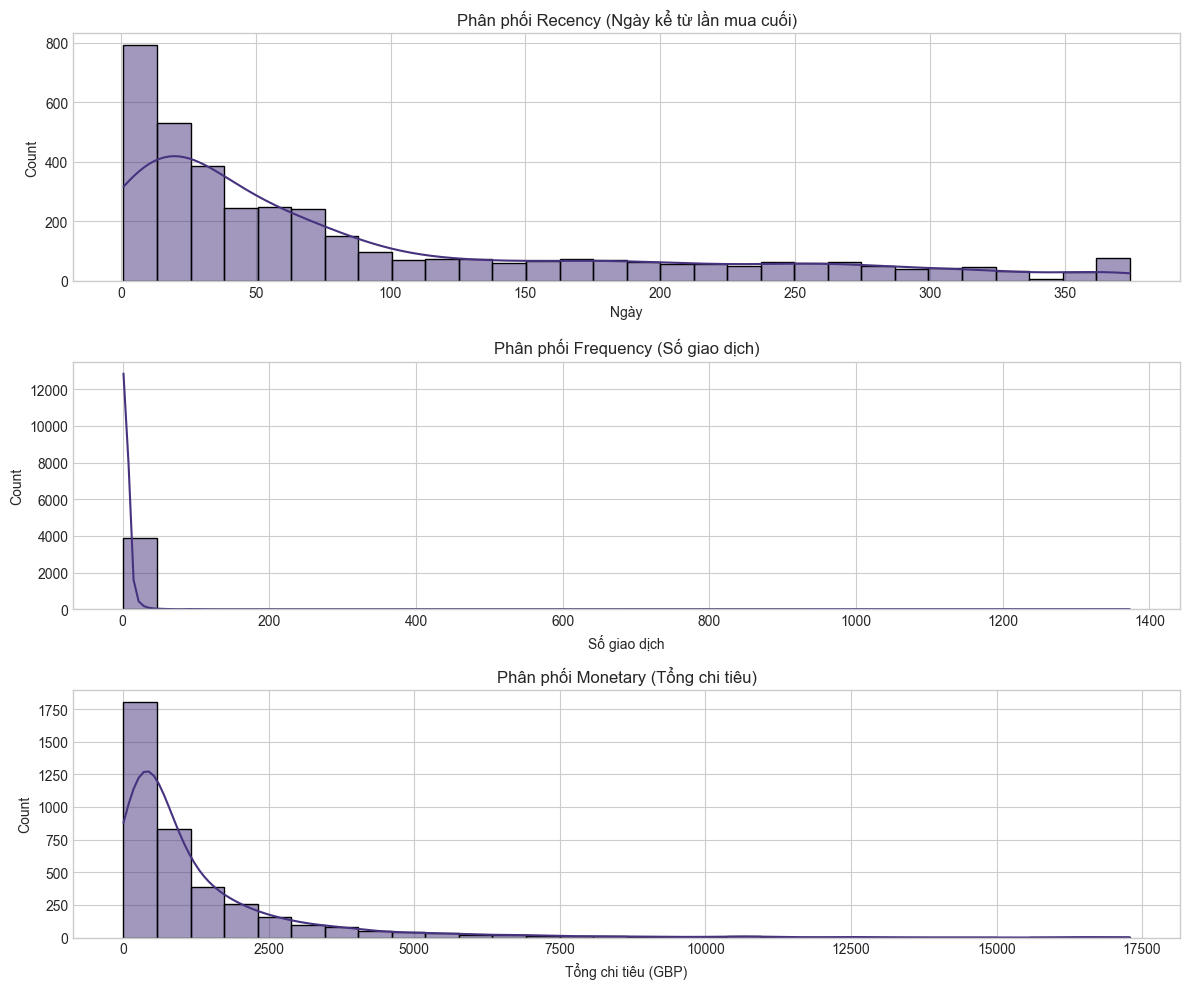

In [14]:
# Trực quan hoá phân phối RFM
if PLOT_RFM:
    visualizer.plot_rfm_analysis(rfm_data)

In [15]:
# Lưu dữ liệu đã làm sạch
cleaner.save_cleaned_data(output_dir=OUTPUT_DIR)

print("Dữ liệu đã được lưu thành công:")
print(f"- Thư mục: {OUTPUT_DIR}")
print("- File: cleaned_uk_data.csv")
print(f"- Kích thước: {df_country.shape[0]:,} dòng")
print("- Sẵn sàng cho bước feature engineering / association rules")


Đã lưu dữ liệu đã làm sạch: data/processed/cleaned_uk_data.csv
Dữ liệu đã được lưu thành công:
- Thư mục: data/processed
- File: cleaned_uk_data.csv
- Kích thước: 485,123 dòng
- Sẵn sàng cho bước feature engineering / association rules
